The Langevin algorithm is a simple and powerful method to sample from a probability distribution. 

## The Unadjusted Langevin Algorithm (ULA)

The Langevin algorithm –also known as Langevin Monte Carlo and Langevin MCMC– is an algorithm for generating samples from a probability distribution for which we have access to the gradient of its log probability. 

We want to sample from the target density

$$
q(x)=\frac{1}{Z} \exp (-f(x))
$$
where low values of $f(x)$ correspond to high probability.

A natural way to do this is to construct **a continuous-time process** that "flows" toward regions of high probability while still exploring the space. This is achieved by the Langevin diffusion, described by the stochastic differential equation (SDE):

$$ d X_t=-\nabla f\left(X_t\right) d t+\sqrt{2} d W_t $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ula_sample_2d(f_grad, x0, delta, n_steps):
    """
    ULA sampler for a 2D function.
    
    Parameters:
    - f_grad: A function that computes the gradient of f.
    - x0: Initial 2D point (numpy array of shape (2,)).
    - delta: Step size.
    - n_steps: Number of iterations.
    
    Returns:
    - samples: Array of shape (n_steps+1, 2) containing the trajectory.
    """
    x = x0.copy()
    samples = [x.copy()]
    for _ in range(n_steps):
        noise = np.sqrt(2 * delta) * np.random.randn(2)
        x = x - delta * f_grad(x) + noise
        samples.append(x.copy())
    return np.array(samples)

# Define the gradient for f(x)=0.5*(x1^2+x2^2)
def f_grad(x):
    return x

# Simulation parameters
delta = 0.1    # step size
n_steps = 1000 # number of iterations
x0 = np.array([4.0, -4.0])  # starting point far from the center

# Run ULA sampler
samples_2d = ula_sample_2d(f_grad, x0, delta, n_steps)


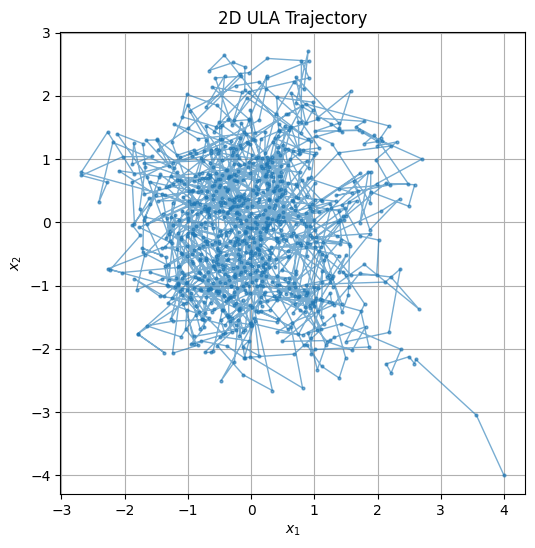

In [5]:
plt.figure(figsize=(6,6))
plt.plot(samples_2d[:,0], samples_2d[:,1], marker='o', markersize=2, lw=1, alpha=0.6)
plt.title("2D ULA Trajectory")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.axis("equal")
plt.show()


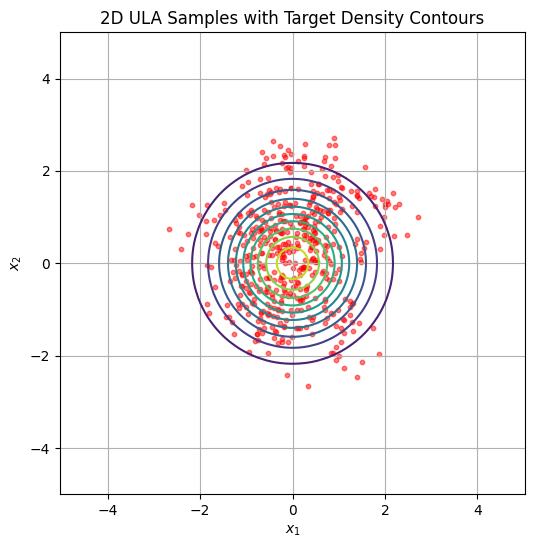

In [6]:
# Create a grid for contour plotting
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
# Compute the target density: standard 2D Gaussian
Z = (1/(2*np.pi)) * np.exp(-0.5*(X1**2 + X2**2))

plt.figure(figsize=(6,6))
plt.contour(X1, X2, Z, levels=10, cmap='viridis')

# Use samples after burn-in (e.g., last half)
burn_in = n_steps // 2
plt.scatter(samples_2d[burn_in:,0], samples_2d[burn_in:,1], s=10, alpha=0.5, color='red')
plt.title("2D ULA Samples with Target Density Contours")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.axis("equal")
plt.show()
